In [1]:
import pandas as pd
import numpy as np

In [180]:
orig_data = pd.read_csv('resume-filter.csv', sep=",")
orig_data.head()

,age,Education-level,certificate,internship,siblings,Peducation-level,gender,Class
0,'18-25','graduate','Yes','Yes','No','graduate','female','hired'
1,'18-25','graduate','Yes','Yes','No','graduate','female','hired'
2,'26-30','graduate','Yes','Yes','Yes','hsc','female','not-hired'
3,'18-25','graduate','Yes','Yes','Yes','ug','female','hired'
4,'18-25','graduate','Yes','No','No','graduate','female','not-hired'


In [182]:
category_counts = []
for i in list(orig_data):
    category_counts.append(orig_data[i].value_counts())
    category_counts.append(60 * '-')
category_counts

['18-25'    62
 '26-30'    38
 Name: age, dtype: int64,
 '------------------------------------------------------------',
 'hsc'         44
 'ug'          32
 'graduate'    24
 Name: Education-level, dtype: int64,
 '------------------------------------------------------------',
 'Yes'     84
 'No'      10
 '6-8'      4
 '9-11'     2
 Name: certificate, dtype: int64,
 '------------------------------------------------------------',
 'No'     70
 'Yes'    26
 Yes       4
 Name: internship, dtype: int64,
 '------------------------------------------------------------',
 'Yes'    51
 'No'     49
 Name: siblings, dtype: int64,
 '------------------------------------------------------------',
 'graduate'    54
 'hsc'         38
 'ug'           8
 Name: Peducation-level, dtype: int64,
 '------------------------------------------------------------',
 'male'      68
 'female'    32
 Name: gender, dtype: int64,
 '------------------------------------------------------------',
 'hired'        73
 'not

In order to make this easier to visualize with a decision tree, I've binarized education level and certification columns (in Excel) so that they will appear in the tree as left/right node splits. Additionally, "Peducation-level" and "Education-level" look like duplicates, so I've removed "Peducation level"

In [183]:
data = pd.read_csv('resume-filter-modified.csv', sep=",")
data.head()

,age,Education-ug,Education-hsc,Education-graduate,certificate-Yes,certificate-No,certificate-6-8,certificate-9-11,internship,siblings,gender,Class
0,'18-25',0,0,1,1,0,0,0,'Yes','No','female','hired'
1,'18-25',0,0,1,1,0,0,0,'Yes','No','female','hired'
2,'26-30',0,0,1,1,0,0,0,'Yes','Yes','female','not-hired'
3,'18-25',0,0,1,1,0,0,0,'Yes','Yes','female','hired'
4,'18-25',0,0,1,1,0,0,0,'No','No','female','not-hired'


In [181]:
category_counts = []
for i in list(data):
    category_counts.append(data[i].value_counts())
    category_counts.append(60 * '-')
category_counts

['18-25'    62
 '26-30'    38
 Name: age, dtype: int64,
 '------------------------------------------------------------',
 0    68
 1    32
 Name: Education-ug, dtype: int64,
 '------------------------------------------------------------',
 0    56
 1    44
 Name: Education-hsc, dtype: int64,
 '------------------------------------------------------------',
 0    76
 1    24
 Name: Education-graduate, dtype: int64,
 '------------------------------------------------------------',
 1    84
 0    16
 Name: certificate-Yes, dtype: int64,
 '------------------------------------------------------------',
 0    90
 1    10
 Name: certificate-No, dtype: int64,
 '------------------------------------------------------------',
 0    96
 1     4
 Name: certificate-6-8, dtype: int64,
 '------------------------------------------------------------',
 0    98
 1     2
 Name: certificate-9-11, dtype: int64,
 '------------------------------------------------------------',
 'No'     70
 'Yes'    30
 Name: i

In order to use the decision tree, categorical data has to be transformed into numerical data. Since all of our data features are binary features, each feature will be converted into 1s and 0s.

In [186]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
encoded_data = data.apply(le.fit_transform)

In [187]:
encoded_data.head()

,age,Education-ug,Education-hsc,Education-graduate,certificate-Yes,certificate-No,certificate-6-8,certificate-9-11,internship,siblings,gender,Class
0,0,0,0,1,1,0,0,0,1,0,0,0
1,0,0,0,1,1,0,0,0,1,0,0,0
2,1,0,0,1,1,0,0,0,1,1,0,1
3,0,0,0,1,1,0,0,0,1,1,0,0
4,0,0,0,1,1,0,0,0,0,0,0,1


In [190]:
category_counts = []
for i in list(encoded_data):
    category_counts.append(encoded_data[i].value_counts())
    category_counts.append(60 * '-')
category_counts

[0    62
 1    38
 Name: age, dtype: int64,
 '------------------------------------------------------------',
 0    68
 1    32
 Name: Education-ug, dtype: int64,
 '------------------------------------------------------------',
 0    56
 1    44
 Name: Education-hsc, dtype: int64,
 '------------------------------------------------------------',
 0    76
 1    24
 Name: Education-graduate, dtype: int64,
 '------------------------------------------------------------',
 1    84
 0    16
 Name: certificate-Yes, dtype: int64,
 '------------------------------------------------------------',
 0    90
 1    10
 Name: certificate-No, dtype: int64,
 '------------------------------------------------------------',
 0    96
 1     4
 Name: certificate-6-8, dtype: int64,
 '------------------------------------------------------------',
 0    98
 1     2
 Name: certificate-9-11, dtype: int64,
 '------------------------------------------------------------',
 0    70
 1    30
 Name: internship, dtype: in

In [191]:
# split features and target, convert to matrix
X = encoded_data.drop('Class', 1)
Y = encoded_data['Class']
X = X.as_matrix()
Y = Y.as_matrix()

In [192]:
# build decision tree
from sklearn import tree
clf = tree.DecisionTreeClassifier(random_state=3, criterion='entropy', 
                                  splitter='best', max_depth=None, min_samples_split=1)
clf = clf.fit(X, Y)

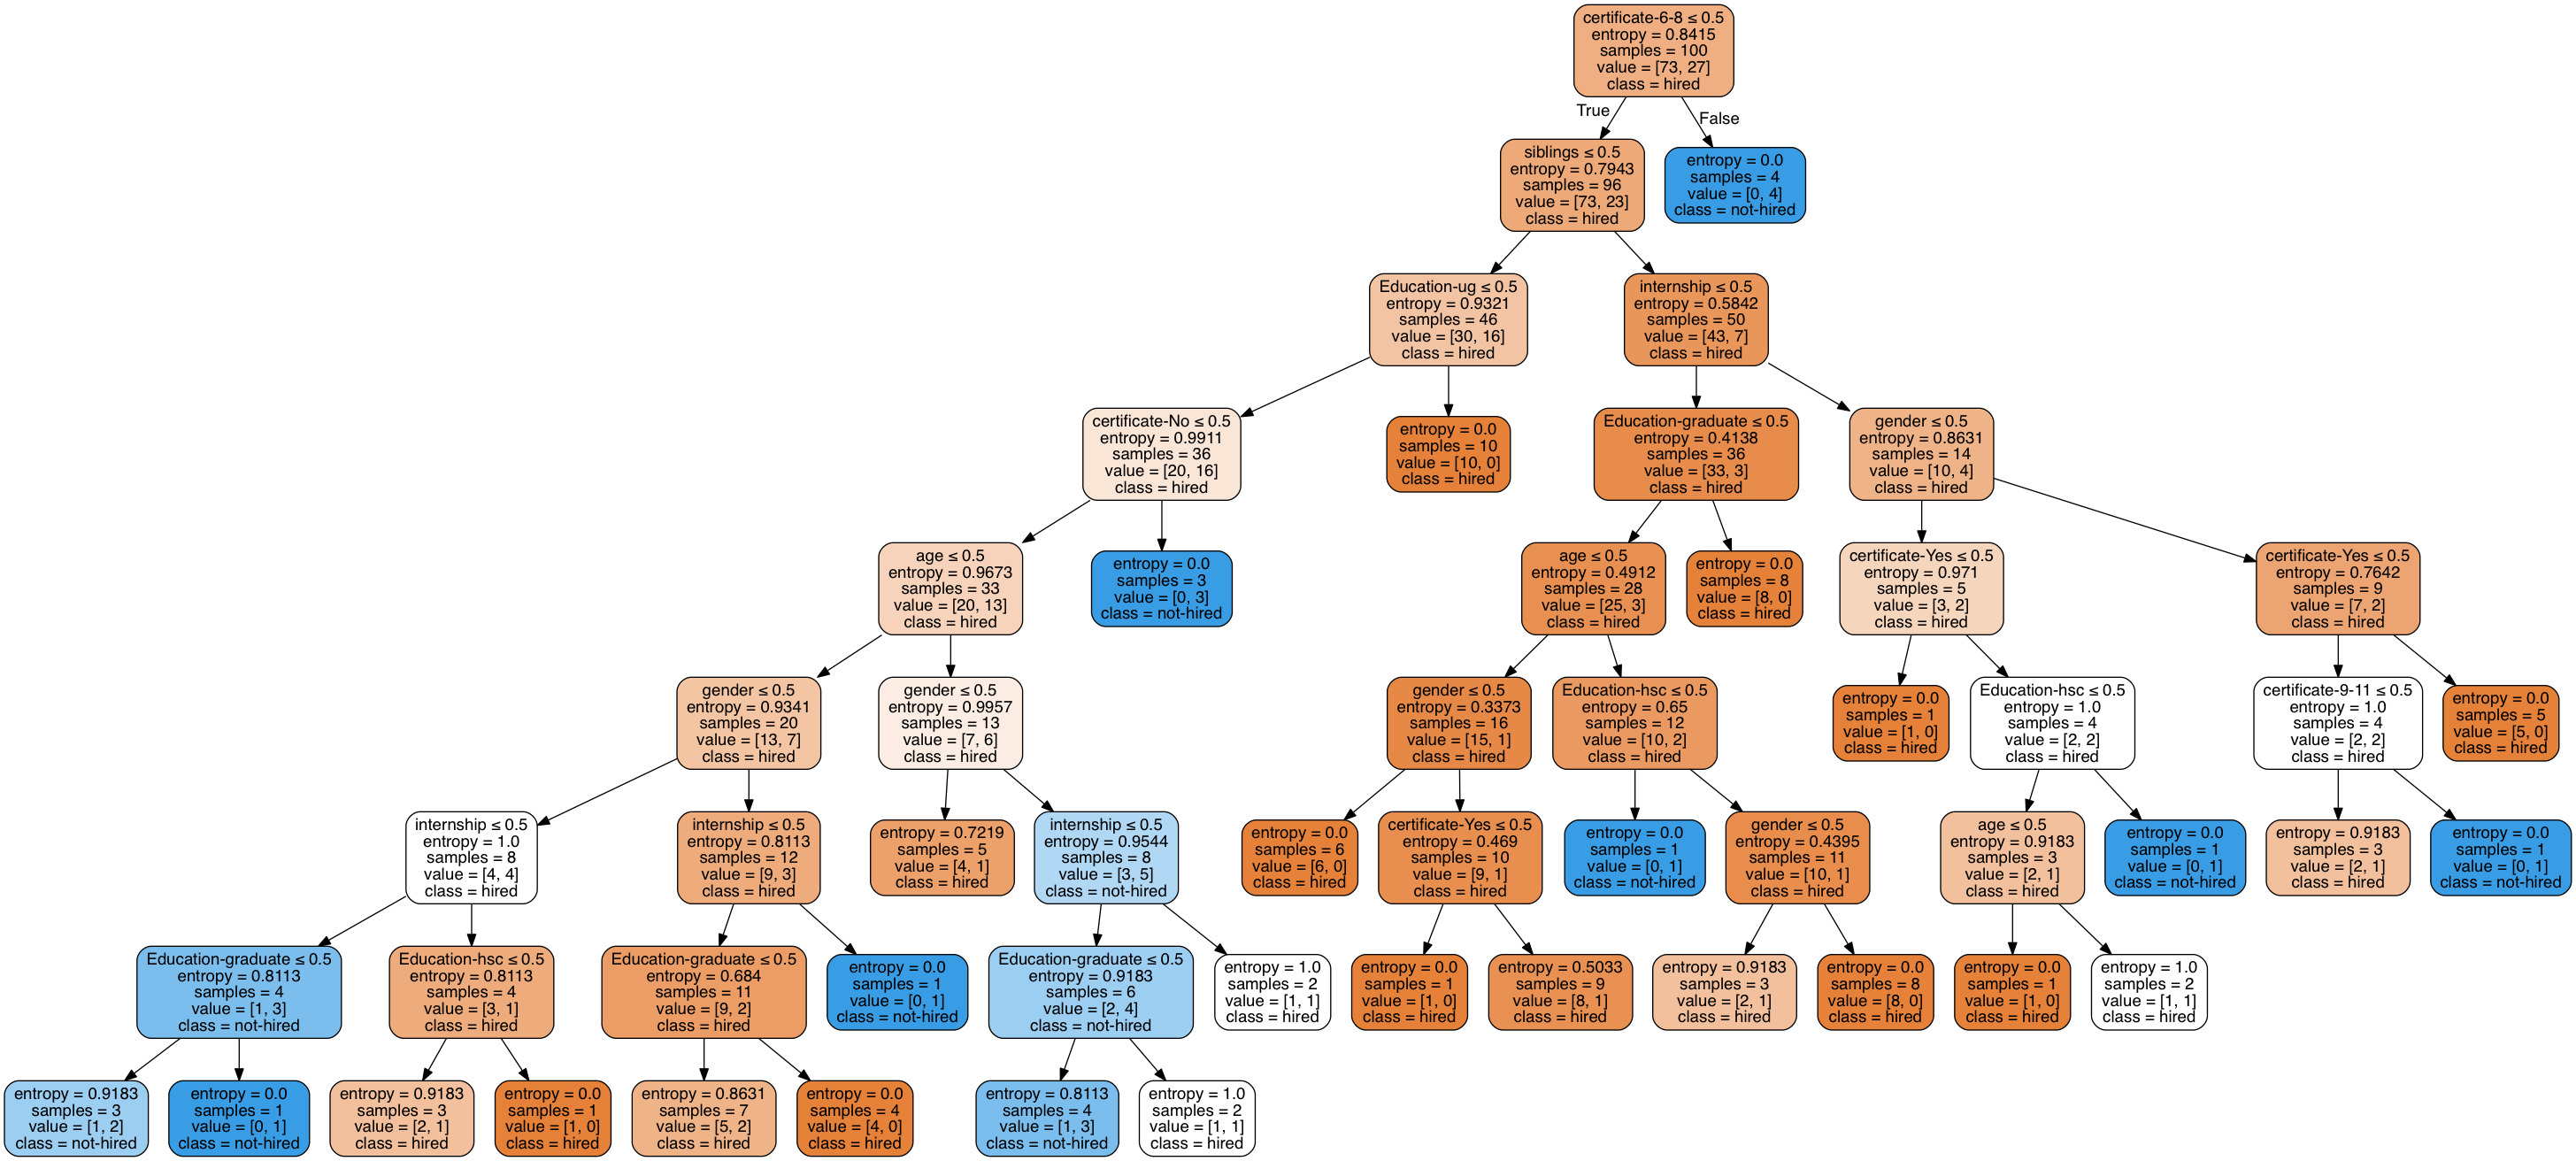

In [193]:
# display decision tree

from IPython.display import Image
import pydotplus

dot_data = tree.export_graphviz(clf, out_file="resume.dot", feature_names=list(data.drop('Class',1)),  
                         class_names=['hired', 'not-hired'],  
                         filled=True, rounded=True,  
                         special_characters=True, leaves_parallel=False)
graph = pydotplus.graphviz.graph_from_dot_file("resume.dot")
Image(graph.create_png())